# An example of using EASYMORE with source netCDF files longitude between 0 to 360 while the target shapefile is from -180 to 180
## Remapping of GRACE to the location of the capital cities around the world
## data should be downloaded using the following instructions: https://github.com/podaac/data-subscriber

In [1]:
# loading EASYMORE
from easymore import Easymore
# initializing EASYMORE object
esmr = Easymore()

config     = {
"case_name"   : "capitals_GRACE",
"temp_dir"    : "./temporary/",
"target_shp"  : "./data/target_shapefiles/Capitals_point.shp", 
"source_nc"   : "../../GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc", 
"var_names"   : ["lwe_thickness"],
"var_lon"     : "lon",
"var_lat"     : "lat",
"var_time"    : "time",
"output_dir"  : "./output/"
}

esmr = esmr.from_dict(config)

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 2.0.1 is initiated.
EASYMORE version 2.0.1 is initiated.
no author name is provided.
EASYMORE will remap variable  lwe_thickness  from source file to variable  lwe_thickness  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'lat', 'lon']
EASYMORE detects that the longitude variables has dimensions of:
['lon']
EASYMORE detects that the latitude variables has dimensions of:
['lat']
--CREATING-REMAPPING-FILE--
Started at date and time 2025-05-07 19:58:05.405629
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 project

/Users/shg096/Desktop/EASYMORE/env/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:880: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  shp.geometry.iloc[index] = polys


./temporary/capitals_GRACE_source_shapefile.gpkg
EASYMORE created the shapefile from the netCDF file and saved it here:
EASMORE detects that target shapefile is outside the boundary of source netCDF file  and therefore correction for longitude values -180 to 180 or 0 to 360 if correction_shp_lon  flag is set to True [default is True]
correcting target shapefile
correcting source shapefile
EASYMORE detects that the shapefile is in region 180 to 360 and correct by moving -360


/Users/shg096/Desktop/EASYMORE/env/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:2141: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  shp_intC.geometry.iloc[index] = polys


EASYMORE detects that the shapefile is also in region -180 to 180
Ended at date and time 2025-05-07 20:01:00.103087
It took 174.697458 seconds to finish creating of the remapping file
---------------------------
------REMAPPING------
netcdf output file will be compressed at level 4
Remapping ../../GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc to ./output/capitals_GRACE_remapped_GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc 
Started at date and time 2025-05-07 20:01:00.206274 
Ended at date and time 2025-05-07 20:01:01.672431 
It took 1.466157 seconds to finish the remapping of variable(s) 
---------------------
---------------------


<xarray.DataArray 'lwe_thickness' (time: 191)> Size: 2kB
[191 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2002-04-17T12:00:00 ... 2020-11-16
    ID       float64 8B 182.0
Attributes:
    long_name:  Liquid_Water_Equivalent_Thickness
    units:      cm


<Figure size 1500x500 with 0 Axes>

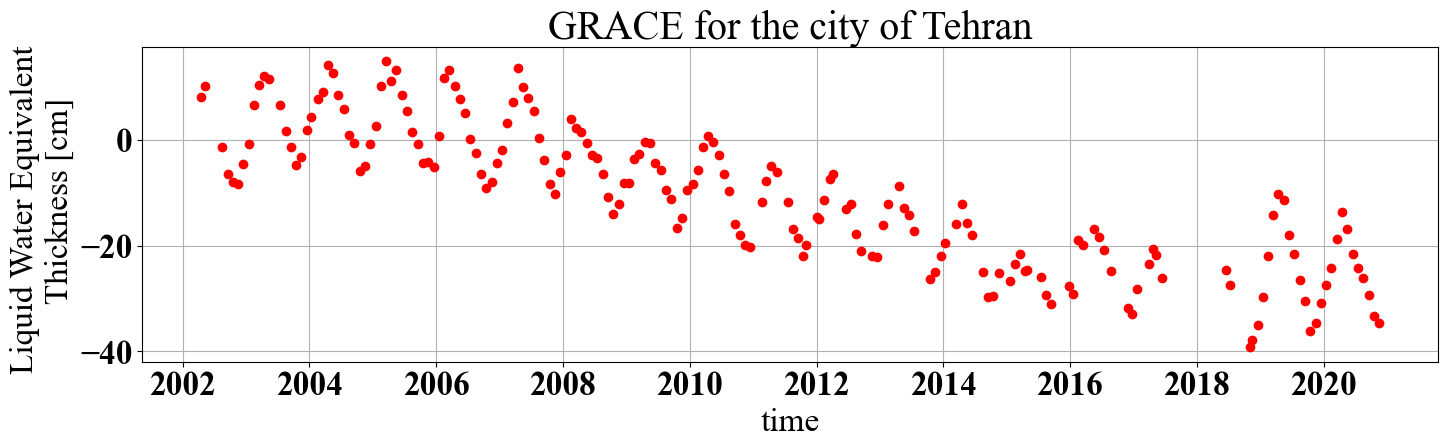

In [3]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

capital_name = 'Tehran'

ds = xr.open_dataset('./output/capitals_GRACE_remapped_GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc')

shp = gpd.read_file('./temporary/capitals_GRACE_target_shapefile.gpkg')
shp = shp[shp['name']==capital_name] # get the data for given capital

# plot found values from the ID of the city
plt.figure(figsize=(15,5))
ds_slice = ds.sel(ID = shp.ID_t.iloc[0]) # slice the data for the capital
print(ds_slice['lwe_thickness'])

# plot the data
fig, axes = plt.subplots(1,1,figsize=(15,5), facecolor='white')
ds_slice.lwe_thickness.plot(marker='o', color='blue', linewidth=1, markerfacecolor='red',markeredgecolor='red', linestyle='none')
plt.ylabel('Liquid Water Equivalent \n Thickness [cm]')
plt.grid()
plt.title('GRACE for the city of '+ capital_name)
plt.tight_layout()
plt.savefig('./fig/GRACE_'+capital_name+'.png')
plt.savefig('./fig/GRACE.png')

# # plot found values form the lat lon of the city from the source file
# plt.figure(figsize=(15,5))
# ds = xr.open_dataset(GRACE_file_path)
# if shp.lon_t.iloc[0] > 0:
#     ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]     , method ='nearest' )
# else:
#     ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]+ 360, method ='nearest' )
# ds_slice.lwe_thickness.plot()
# plt.grid()


In [3]:
# import xarray as xr
# import urllib.request
# import numpy as np
# import pandas as pd
# import os
# from   datetime import datetime
# import time
# import hashlib
# import requests
# from   bs4 import BeautifulSoup

# # download GRACE data 
# pwd = './temporary/' #
# url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/tellus/L3/mascon/RL06/JPL/v02/CRI/netcdf/'

# def GRACE_download(url, pwd): # downlaod and unzip
    
#     # 
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, "html.parser")
    
#     # 
#     for link in soup.find_all():
#         href = link.get("href")
#         if href and href.startswith("GRCTellus.JPL.") and href.endswith(".nc"):
#             GRACE_name = href
#             GRACE_link = url+GRACE_name
#         if href and href.startswith("GRCTellus.JPL.") and href.endswith(".nc.md5"):
#             md5_link = url+href
            
#     if not os.path.isdir(pwd):
#         os.makedirs(pwd)
    
#     # get the md5
#     urllib.request.urlretrieve(md5_link, pwd+'GRACE.nc.md5')
    
#     # get the md5 value
#     with open(pwd+'GRACE.nc.md5', 'r') as f:
#         first_line = f.readline().strip()
#         first_line_list = first_line.split()
#         md5 = first_line_list[0]

    
#     # remove existing file is exists
#     if os.path.isfile(pwd+GRACE_name) and hash_file(pwd+GRACE_name) == md5:
#         print('It seems the file exists; perhaps perviously downloaded; will skip downloading')
#     else:
#         # download the file
#         print('Downloading GRACE; this may take a while ...')
#         print('Downloading starts at: ', datetime.now())
#         urllib.request.urlretrieve(GRACE_link, pwd+GRACE_name)
#         print('Downloading ends at: ', datetime.now())
#         if not (hash_file(pwd+GRACE_name) == md5):
#             sys.exit('the file was not downloaded successfully. You can download manually.')
            
#     return pwd+GRACE_name


# def hash_file(filename):
#    """This function returns the MD5 hash
#    of the file passed into it"""
#    # make a hash object
#    h = hashlib.md5()
#    # open file for reading in binary mode
#    with open(filename,'rb') as file:
#        # loop till the end of the file
#        chunk = 0
#        while chunk != b'':
#            chunk = file.read(1024)
#            h.update(chunk)
#    # return the hex representation of digest
#    return h.hexdigest()

# # get the link that the file is located

# GRACE_file_path = GRACE_download(url, pwd)


# # https://github.com/podaac/data-subscriber